<a href="https://colab.research.google.com/github/tuananhnguyen512/123/blob/main/AI_W4_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


SyntaxError: ignored

45.0


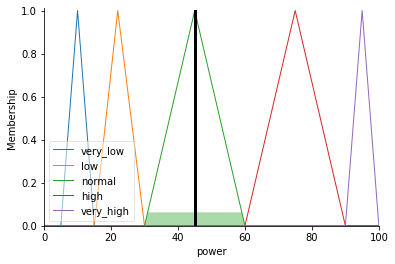

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

time = ctrl.Antecedent(np.arange(0, 181, 1), 'time')
#Unit of rice: g
rice = ctrl.Antecedent(np.arange(0, 1600, 100), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very_fast'] = fuzz.trimf(time.universe, [10, 10, 20])
time['fast'] = fuzz.trimf(time.universe, [19, 25, 30])
time['average'] = fuzz.trimf(time.universe, [29, 45, 60])
time['slow'] = fuzz.trimf(time.universe, [59, 105, 150])
time['very_slow'] = fuzz.trimf(time.universe, [150, 165, 180])

rice['very_little'] = fuzz.trimf(rice.universe, [100, 150, 300])
rice['little'] = fuzz.trimf(rice.universe, [299, 400, 500])
rice['average'] = fuzz.trimf(rice.universe, [499, 600, 700])
rice['much'] = fuzz.trimf(rice.universe, [699, 850, 1000])
rice['very_much'] = fuzz.trimf(rice.universe, [999, 1250, 1501])

power['very_low'] = fuzz.trimf(power.universe, [5, 10, 15])
power['low'] = fuzz.trimf(power.universe, [15, 22, 30])
power['normal'] = fuzz.trimf(power.universe, [30, 45, 60])
power['high'] = fuzz.trimf(power.universe, [60, 75, 90])
power['very_high'] = fuzz.trimf(power.universe, [90, 95, 100])

# time.view()
# rice.view()
# power.view()

rule1 = ctrl.Rule(time['very_fast'] & rice['very_little'], power['very_low'])
rule2 = ctrl.Rule(time['very_fast'] & rice['little'], power['low'])
rule3 = ctrl.Rule(time['very_fast'] & rice['average'], power['normal'])
rule4 = ctrl.Rule(time['very_fast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])
rule6 = ctrl.Rule(time['fast'] & rice['very_little'], power['very_low'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['normal'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])

rule11 = ctrl.Rule(time['average'] & rice['very_little'], power['low'])
rule12 = ctrl.Rule(time['average'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['normal'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['very_much'], power['very_high'])

rule16 = ctrl.Rule(time['slow'] & rice['very_little'], power['high'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['very_much'], power['high'])

rule21 = ctrl.Rule(time['very_slow'] & rice['very_little'], power['very_high'])
rule22 = ctrl.Rule(time['very_slow'] & rice['little'], power['high'])
rule23 = ctrl.Rule(time['very_slow'] & rice['average'], power['very_high'])
rule24 = ctrl.Rule(time['very_slow'] & rice['much'], power['very_high'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['very_high'])


power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,rule13, 
                                 rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['time'] = 30
powering.input['rice'] = 600
powering.compute()

print(powering.output['power'])

power.view(sim=powering)